Click to open this guide directly in Google Colab:  
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/C4dynamics/C4dynamics/blob/main/introduction_guide.ipynb)

# C4DYNAMICS — Interactive Introduction

Welcome!

This notebook teaches the core workflow of c4dynamics through small, hands-on tasks. Each section asks you to run code, inspect results, and complete short exercises designed to build intuition. 

## Further Help and Documentation

If you need clarification on any operation you encounter in this notebook, you can always refer to the [State Objects](https://c4dynamics.github.io/C4dynamics/concepts/states.html) page in the concepts section of the official documentation or to the [State Class](https://c4dynamics.github.io/C4dynamics/api/states.state.html#c4dynamics.states.state.state) in the API section. You'll find detailed explanations, examples, and the full specification of the state-object mechanism used throughout c4dynamics.

## Setup 

If you haven't installed c4dynamics yet, uncomment and run the cell below.  
Follow this [guide](setup_guide.ipynb) for different ways of installation.  

In [ ]:
# !pip install c4dynamics

Import necessary libraries:

In [ ]:
import c4dynamics as c4d
import matplotlib.pyplot as plt
import numpy as np

# Sanity check: Print version
print("c4dynamics version:", c4d.__version__)

# Defining a State Object

Create a state by specifying variables and initials.

$\color{cyan}{\textit{Task:}}$ Define a state `s` with variables `y=0`, `vy=1`. Print the object and its `X`.

In [ ]:
# TODO: Define the state object
s = c4d.state(  # Fill in: y=0, vy=1
)
 
print("State variables:", s)
print("Initial state vector X:", s.X)

Expected output:  
`State variables: [ y  vy ]`  
`Initial state vector X: [0. 1.]`

# Accessing and Modifying the State Vector

Access via attributes (`s.y`) or indices `X[index]`. Modify directly.


$\color{cyan}{\textit{Task:}}$ Change `y` via attribute and via index. 

Set `y=5`, scale `X[0]` by `2`, print updated `X`. 

In [ ]:
# Build on previous s
# TODO: Access and print
print("Current y:",   # s.y
)
print("Current vy:",   # s.vy
)

# TODO: Modify
s.y =   # 5
s.X *=   # add indexing and multiply y by 2

print("Updated X:", s.X)

Expected output:  

`Current y: 0`  
`Current vy: 1`  
`Updated X: [10  1]`  

$\color{cyan}{\textit{Inline\;Question:}}$ Why both forms (access via attribute and access via index) are needed? Which form is safer?

$\color{magenta}{\textit Your Explanation:}$ Fill in here.

# Initial Conditions

Learn initialization. View the initial conditions. 

In the previous section we initialized `s` with `y=0`, `vy=1`. 
These values were modified after running some operations. 
To access the initial conditions easly, we can use the same methods that we access the variables with the prefix `0`. For example, attributing y0: `s.y0`, indexing y0: `s.X0[0]`.  

$\color{cyan}{\textit{Task:}}$ Print `y0` via attribute and `vy0` via index. 

In [ ]:
# Don't change current values of s. 
# TODO: Access and print initial values. 
print("Current y0:",   # s.y0
)
print("Current vy0:",   # index X0 for vy0 
)

print("X0:", s.X0)

Expected output:
`Current y0: 0`  
`Current vy0: 1`  
`X0: [0 1]`

# Understanding State Objects

A state object in c4dynamics represents a state-space model by encapsulating a state vector `X` (NumPy array) with named variables (e.g., `x`, `y`).

$\color{cyan}{\textit{Inline\;Question:}}$ Why use a state object instead of a plain NumPy array for simulations?

$\color{cyan}{\textit{Hint:}}$ Think about what information and structure a simulation needs beyond just numbers. 

$\color{magenta}{\textit{Your\;Answer:}}$ Fill in here.

# Math Operations on State Objects

Use NumPy operations on `X` for dynamics (e.g., matrix multiplication).

$\color{cyan}{\textit{Task:}}$ Define `2x2` transition matrix $ F = \begin{bmatrix} 1 & 1 \\ 0 & 1 \\ \end{bmatrix} $.  
Apply $ F \cdot X $.  
Add $ u = \begin{bmatrix} 0 \\ 0.5 \\ \end{bmatrix} $.  
Print after each.

In [ ]:
# TODO: Define F
F = np.array(  # [[1, 1], [0, 1]]
)

# TODO: Apply matrix operation (In NumPy, you can perform matrix multiplication using the @ operator, for example C = A @ B. Remember that matrix multiplication is not commutative; the order of the factors matters). 
s.X =   # ...

print("After matrix op:", s.X)

# TODO: Define and add u
u = np.array(  # ...
)
s.X +=   # ...

print("After addition:", s.X)

Expected output:  

`After matrix op: [11  1]`  
`After addition: [11  1.5]`

$\color{cyan}{\textit{Goal:}}$ 
Get familiarize with all the math operations of the state objects: [State object math operations](https://c4dynamics.github.io/C4dynamics/concepts/states.html#id8)

# Data Operations: Storing and Retrieving State Data

$\color{cyan}{\textit{Goal:}}$ 
Store the state over time with `store(t)`. Retrieve with `data('var')`.

$\color{cyan}{\textit{Task:}}$ Reset `s` (`y=0, vy=1`), store at `t=0`.  
Loop `t=1` to `4`: Update `X = F @ X + noise` (`np.random.normal(0,0.1,2)`), store.  
Retrieve `y` histories and plot.

In [ ]:
# TODO: Reset s
s = c4d.state(  # y=0, vy=1
)
s.store(t=0)

# set seed to reproduce results 
np.random.seed(12345)

# TODO: Simulation loop
for t in range(  # 1,5
):
    s.X =   # F @ s.X + np.random.normal(0,0.1,2)
    s.store(t)


In [ ]:
# TODO: Retrieve history data 
times, y_values = s.data(  # 'y'
)
print("Time histories: ", times)
print("Y values: ", y_values)

Expected output:  
`Time histories:  [0. 1. 2. 3. 4.]`  
`Y values:  [0. 0.97952923 1.9754797  3.16437906 4.30533173]`  

In [ ]:
# TODO: Plot y over time 

s.plot( #	'y'
)

Expected figure:

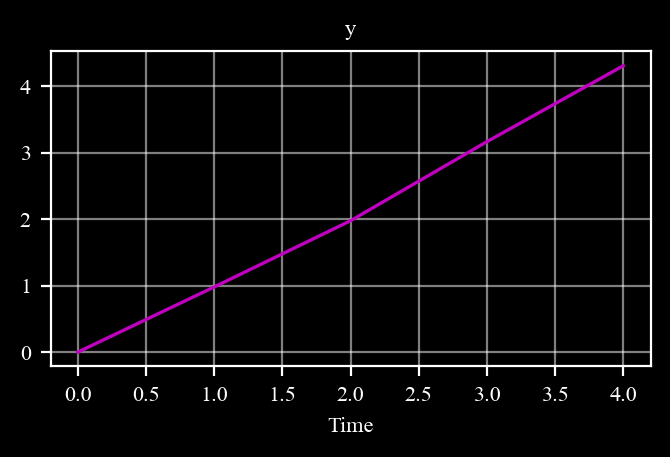

$\color{cyan}{\textit{Goal:}}$ 
Get familiarize with all the data operations of the state objects: [State object data operations](https://c4dynamics.github.io/C4dynamics/concepts/states.html#id9)

## Scale Data

Assume that y is given in units of [km] and we want to scale it to units of [m] (i.e. scaling by 1000). 

$\color{cyan}{\textit{Task:}}$ 
Repeat the two last operations, print and plot y, by scaling data() by 1000: data('y', scale = 1000), and scale plot by 1000: plot('y', scale = 1000)

In [ ]:
# TODO: Plot y histories scaled by 1000 
...

Expected results for scaled data: `Y values:  [0. 979.52923405 1975.47969635 3164.37905697 4305.33173132]`

In [ ]:
# TODO: Plot y over time scaled by 1000

Expected figure: `As earlier with y values scaled by 1000`. 

# Parameters 

Parameters are data attributes which are not part of the state **vector**.  
These quantities belong to the state object but do not evolve with the equations that descirbe the system dynamics.
They stay fixed during a simulation or evlove by external conditions. 

$\color{cyan}{\textit{Task:}}$ 
Define a mass parameter, print its value. Modify it. Store the parameters before and after the modification. Retrieve history values.  

In [ ]:
# Build on previous s
# TODO: Add a mass parameter

s.mass = 			# 2 # kg  

print("System mass:",   # s.mass
)

# TODO: Store the current mass parameter:
s.storeparams( 			# 'mass', t = 0
)

# Modify the mass
s.mass = 			#   

# Store the modified mass in different time step: 
s.storeparams( 			# ... 
)


# TODO: Retrieve mass history: 
t_mass, mass_data = s.data( 			# 'mass' 
) 

print("Modification Times:", 		# t_mass
)

print("Mass histories:", 		# mass_data
)

Example output:   
`System mass: 2`  
`Modification Times: [0 1]`  
`Mass histories: [2. 5.]`   

# Constants 

C4dynamics includes several constants as global quantities and conversion units  (the complete list can be found [here](https://c4dynamics.github.io/C4dynamics/api/utils.const.html)).  
These constants are accessible directly from the c4dynamics namespace.
For example, if c4dynamics is imported as `c4d`, then the value of `π` is given by `c4d.pi`. 


In [ ]:
# TODO: import degrees to radians constant (d2r)
# from c4dynamics import d2r

phi_deg = 50
phi_rad = phi_deg  	# TODO: mutliply by degrees to radians constant 

print(phi_deg, "° after conversion to radians:", phi_rad)


Expected: `50° after conversion to radians: 0.8726646259971648`

# Example 1: Pendulum Simulation

$\color{cyan}{\textit{Goal:}}$ Model a pendulum system with angle $\theta$ and angular velocity $q$.  
Start with some initial conditions and use Euler integration to solve the equations of motion.

$\color{cyan}{\textit{Task:}}$  
Set parameters:   
$g=9.8$  
$L=1$  
$dt=0.001$  
Define `pend = state(theta = 50 * d2r, q = 0)`.  
Loop `t=0` to `5`:  
1. store the state 
2. write the derivatives of pendulum dynamics: $dX=\begin{bmatrix} q \\ -(g/L) \cdot sin(\theta) \\ \end{bmatrix}$
3. Euler-integrate the derivatives: $X = X + dX \cdot dt$  
Plot theta.

`Note`: use c4dynamics degrees to radians conversion constant to initialize theta in radians. 


In [ ]:
from c4dynamics import d2r 

# TODO: set parameters for the pendulum simulation 
g =   # 9.81
L =   # 1.0
dt =   # 0.001
 
# TODO: Define the pendulum object with initial conditions
pend = c4d.state(  # theta = , q = 
)

# TODO: Simulation loop
for t in np.arange(  # 0, 5, dt
):
    pend.store(t)
    dX = np.array([  # pend.q, - (g / L) * np.sin(pend.theta)
    ])
    pend.X +=   # dX * dt



In [ ]:
# TODO: plot the angle data scaled back to degrees 

pend.plot( # 'theta', scale = c4d.r2d
)

Expected figure:

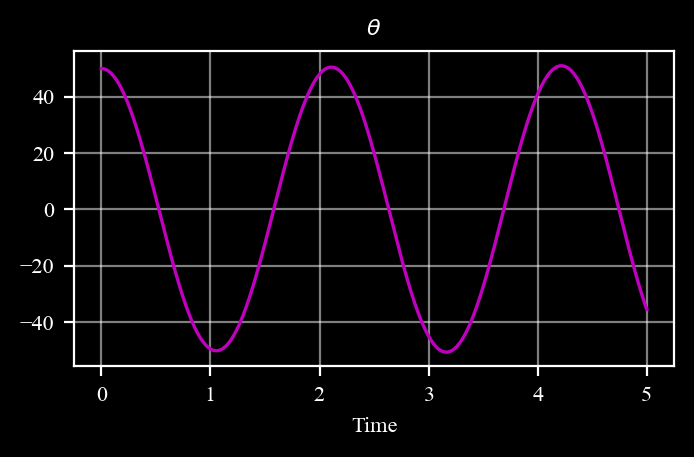

$\color{cyan}{\textit{Inline Question:}}$ What's the disadvantage of the Euler integration we used? what's its advantage? which other integration methods do you know? 

$\color{magenta}{\textit{Your Answer:}}$ Fill in here.

# Example 2: Car Moving in 2D

$\color{cyan}{\textit{Goal:}}$ Simulate the 2D motion of a constant-acceleration car.  

State variables: `x,y` (position), `vx,vy` (velocity).  
Constant `accel_x=0.5`.

Task: Set `dt=0.1`, `accel_x=0.5`.  
Define car (`x=0,y=0,vx=0,vy=1`), store `t=0`.  
Loop `t=dt` to `5`:` dX=[vx,vy,accel_x,0]`, `X += dX*dt`, store.  
Plot trajectory (`x` vs `y`).

In [ ]:
# TODO: Parameters
dt =   # 0.1
accel_x =   # 0.5

# TODO: Define and store initial
car = c4d.state(  # x=0, y=0, vx=0, vy=1
)
car.store(t=0)

# TODO: Simulation loop
for t in np.arange(  # dt, 5+dt, dt
):
    dX = np.array([  # car.vx, car.vy, accel_x, 0
    ])
    car.X +=   # dX * dt
    car.store(t=t)


In [ ]:
# TODO: Retrieve x and y data to plot the trajectory 

x_values = car.data(  # 'x'
) # [1] # index 1 to get values without time 

y_values = car.data(  # 'y'
) # [1] # index 1 to get values without time [1]


In [ ]:
plt.plot( # x_values, y_values 
)
c4d.plotdefaults(plt.gca(), 'Car Trajectory', 'X Position', 'Y Position', 12)


Figure Output: 

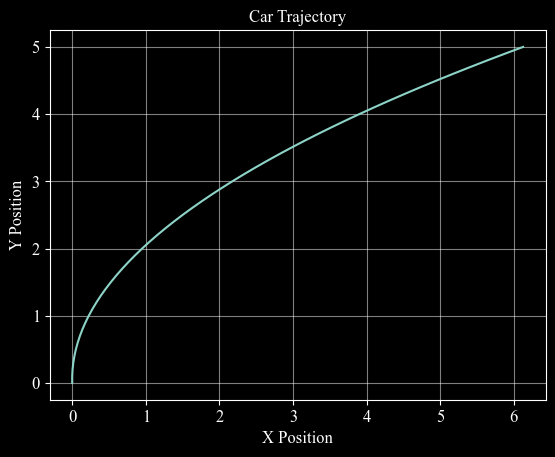

$\color{cyan}{\textit{Inline Question:}}$ Add `accel_y=-0.2` — what's the trajectory? Explain.

$\color{magenta}{\textit{Your Explanation:}}$ Fill in here.

## Congratulations! 
You've completed the introduction to c4dynamics state objects.  

# Next Steps & Feedback

- Experiment more — try complex systems (e.g., double pendulum, drone with attitude).  
- Explore the scientific library to learn about the stateful mechanism in filters, sensors, and controllers.  
- Introduce what you learned to your own system. Replace your arrays with state objects and use the scientific library to develop and test algorithms. 
- Contribute! — This framework is open-source and community-driven.

`We'd love your feedback:`
Found a bug? Open an issue on GitHub.
Want to improve this notebook? Fork the repo, edit, and submit a pull request.
Have ideas? Share feature requests or example use cases.

GitHub Repository: https://github.com/c4dynamics/c4dynamics

Upload your completed version of this notebook there (or link it in an issue) and tell us what worked, what didn’t, and what you'd like to see next!

Your input helps make c4dynamics better for everyone.
Thank you for learning with us!

Notebook created for educational purposes. c4dynamics © 2025